In [1]:
import numpy as np
from SynthTempNetwork import Individual, SynthTempNetwork
from TemporalNetwork import ContTempNetwork, StaticTempNetwork
from FlowStability import FlowIntegralClustering
import pickle

import matplotlib.pyplot as plt
import matplotlib

from scipy.sparse import (lil_matrix, dok_matrix, diags, eye, isspmatrix_csr, isspmatrix,
                          csr_matrix, coo_matrix, csc_matrix)

Could not load sparse_dot_mkl. Will use scipy.sparse for matrix products.


In [ ]:
#load network created with asymmetric_example.ipynb for Figure 2 in Flow stability paper
# net = ContTempNetwork.load('example_network')
# net.compute_laplacian_matrices()

In [2]:
lamdas=np.logspace(-4,2,20)


In [ ]:
# for i in lamdas:
#     net.compute_inter_transition_matrices(lamda=i, dense_expm=False, use_sparse_stoch=False)
#     net.compute_transition_matrices(lamda=i)

# net.save('fig2_network')

In [3]:
net = ContTempNetwork.load('fig2_network')

In [4]:
for i in lamdas:
    net.compute_entropy(lamda=i, force_csr=True)
    # net.compute_vonNeumann_entropy(lamda=i, force_csr=True)
    net.compute_simple_vonNeumann_entropy(lamda=i, force_csr=True)
    # net.compute_entropy2(lamda=i, force_csr=True)

In [5]:
list_forw_flows = []

for i in lamdas:
    list_forw_flows.append(FlowIntegralClustering(T_inter_list=net.inter_T[i],
                                  time_list=net.times,
                                  verbose=True))

PID  5254  : computing T_list
PID  5254  : computing integral
PID  5254  :  0  over  21173  took 0.00s
PID  5254  :  1000  over  21173  took 0.24s
PID  5254  :  2000  over  21173  took 0.23s
PID  5254  :  3000  over  21173  took 0.24s
PID  5254  :  4000  over  21173  took 0.23s
PID  5254  :  5000  over  21173  took 0.23s
PID  5254  :  6000  over  21173  took 0.24s
PID  5254  :  7000  over  21173  took 0.26s
PID  5254  :  8000  over  21173  took 0.26s
PID  5254  :  9000  over  21173  took 0.26s
PID  5254  :  10000  over  21173  took 0.26s
PID  5254  :  11000  over  21173  took 0.26s
PID  5254  :  12000  over  21173  took 0.26s
PID  5254  :  13000  over  21173  took 0.26s
PID  5254  :  14000  over  21173  took 0.26s
PID  5254  :  15000  over  21173  took 0.25s
PID  5254  :  16000  over  21173  took 0.25s
PID  5254  :  17000  over  21173  took 0.25s
PID  5254  :  18000  over  21173  took 0.25s
PID  5254  :  19000  over  21173  took 0.25s
PID  5254  :  20000  over  21173  took 0.25s
PID  5

In [6]:
for i in range(len(lamdas)):
    list_forw_flows[i].find_louvain_clustering()

# Computing and Plotting Entropies

Text(0.5, 1.0, 'Entropy rate')

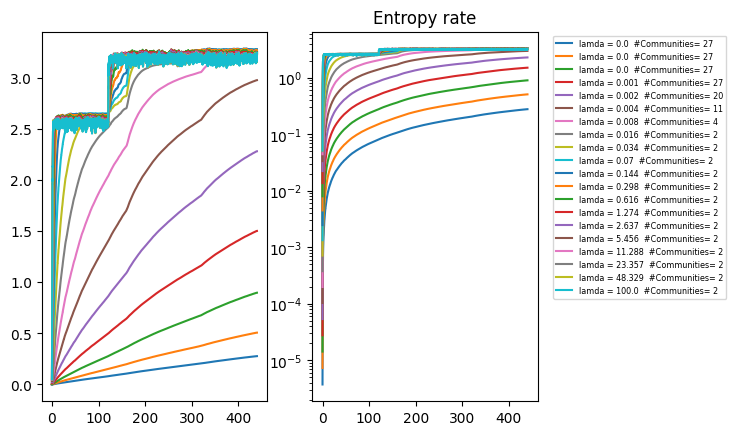

In [29]:
for i in range(len(lamdas)):
    plt.subplot(1, 2, 1)
    plt.plot(net.times[0:-1], net.S[lamdas[i]], label='lamda = ' + str(round(lamdas[i], 3)) + '  #Communities= ' + str(len(list_forw_flows[i].partition[0].cluster_list)))

    plt.subplot(1, 2, 2)
    plt.plot(net.times[0:-1], net.S[lamdas[i]], label='lamda = ' + str(round(lamdas[i], 3)) + '  #Communities= ' + str(len(list_forw_flows[i].partition[0].cluster_list)), )
    plt.yscale('log')
plt.legend(fontsize='xx-small', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('Entropy rate')
#plt.savefig('./fig_entropy_rate', format='eps')

Text(0.5, 1.0, 'Simplified Von Neumann Entropy')

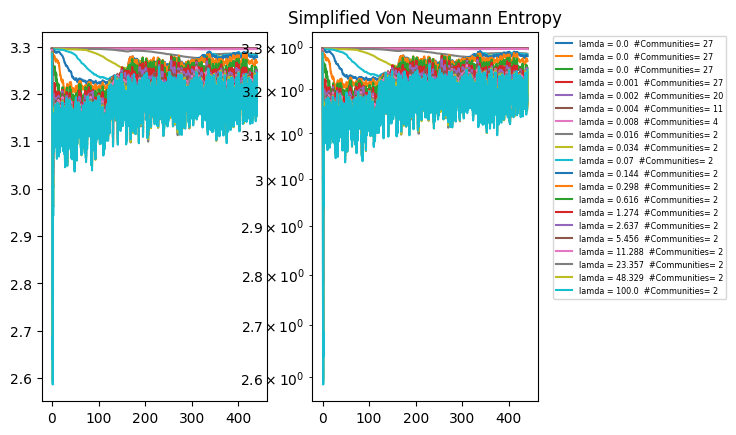

In [30]:
for i in range(len(lamdas)):
    plt.subplot(1, 2, 1)
    plt.plot(net.times[0:-1], net.simple_vNS[lamdas[i]], label='lamda = ' + str(round(lamdas[i], 3)) + '  #Communities= ' + str(len(list_forw_flows[i].partition[0].cluster_list)))

    plt.subplot(1, 2, 2)
    plt.plot(net.times[0:-1], net.simple_vNS[lamdas[i]], label='lamda = ' + str(round(lamdas[i], 3)) + '  #Communities= ' + str(len(list_forw_flows[i].partition[0].cluster_list)), )
    plt.yscale('log')
plt.legend(fontsize='xx-small', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('Simplified Von Neumann Entropy')
#plt.savefig('./fig_simple_vNEntropy', format='eps')

In [ ]:
for i in range(len(lamdas)):
    plt.subplot(1, 2, 1)
    plt.plot(net.S2[lamdas[i]], label='lamda = ' + str(round(lamdas[i], 3)) + '  #Communities= ' + str(len(list_forw_flows[i].partition[0].cluster_list)))

    plt.subplot(1, 2, 2)
    plt.plot(net.S2[lamdas[i]], label='lamda = ' + str(round(lamdas[i], 3)) + '  #Communities= ' + str(len(list_forw_flows[i].partition[0].cluster_list)), )
    plt.yscale('log')
plt.legend(fontsize='xx-small', loc='lower right')
plt.title('Complicated Entropy')
#plt.savefig('./fig_complicated_entropy', format='eps')

In [ ]:
for i in range(len(lamdas)):
    plt.subplot(1, 2, 1)
    plt.plot(net.times[0:-1], [net.T[lamdas[i]][j].trace() for j in range(len(net.T[lamdas[i]]))], label='lamda = ' + str(round(lamdas[i], 3)) + '  #Communities= ' + str(len(list_forw_flows[i].partition[0].cluster_list)))

    plt.subplot(1, 2, 2)
    plt.plot(net.times[0:-1], [net.T[lamdas[i]][j].trace() for j in range(len(net.T[lamdas[i]]))], label='lamda = ' + str(round(lamdas[i], 3)) + '  #Communities= ' + str(len(list_forw_flows[i].partition[0].cluster_list)), )
    plt.yscale('log')
plt.legend(fontsize='xx-small', loc='upper left')
plt.title('Trace of T')

# Static Network, Random Walk Laplacian

In [ ]:
# static_net_adj = net.compute_static_adjacency_matrix()
# static_net = StaticTempNetwork(times = net.times, adjacency = static_net_adj)
# static_net.compute_laplacian_matrices()
# for i in lamdas:
#     static_net.compute_inter_transition_matrices(lamda=i, dense_expm=False, use_sparse_stoch=False)
#     static_net.compute_transition_matrices(lamda=i)

In [37]:
static_net = StaticTempNetwork.load('fig2_network_static_heat')

In [38]:
for i in lamdas:
    static_net.compute_entropy(lamda=i, force_csr=True)
    # static_net.compute_vonNeumann_entropy(lamda=i, force_csr=True)
    static_net.compute_simple_vonNeumann_entropy(lamda=i, force_csr=True)
    #static_net.compute_entropy2(lamda=i, force_csr=True)

/Users/samuelkoovely/Documents/GitHub/flow_stability/flow_stability_env/lib/python3.11/site-packages/scipy/sparse/_base.py:645: RuntimeWarning: divide by zero encountered in scalar divide
  return self.astype(np.float_)._mul_scalar(1./other)
/Users/samuelkoovely/Documents/GitHub/flow_stability/flow_stability_env/lib/python3.11/site-packages/scipy/sparse/_data.py:126: RuntimeWarning: invalid value encountered in multiply
  return self._with_data(self.data * other)


In [ ]:
for i in range(len(lamdas)):
    plt.subplot(1, 2, 1)
    plt.plot(net.times[0:500], static_net.S[lamdas[i]][0:500], label='lamda = ' + str(round(lamdas[i], 3)) + '  #Communities= ' + str(len(list_forw_flows[i].partition[0].cluster_list)))

    plt.subplot(1, 2, 2)
    plt.plot(net.times[0:500], static_net.S[lamdas[i]][0:500], label='lamda = ' + str(round(lamdas[i], 3)) + '  #Communities= ' + str(len(list_forw_flows[i].partition[0].cluster_list)), )
    plt.yscale('log')
plt.legend(fontsize='xx-small', loc='lower right')
plt.title('Entropy rate')
#plt.savefig('./fig_entropy_rate', format='eps')

plt.show()

In [ ]:
for i in range(len(lamdas)):
    plt.subplot(1, 2, 1)
    plt.plot(net.times[0:1000], static_net.simple_vNS[lamdas[i]][0:1000], label='lamda = ' + str(round(lamdas[i], 3)) + '  #Communities= ' + str(len(list_forw_flows[i].partition[0].cluster_list)))

    plt.subplot(1, 2, 2)
    plt.plot(net.times[0:1000],static_net.simple_vNS[lamdas[i]][0:1000], label='lamda = ' + str(round(lamdas[i], 3)) + '  #Communities= ' + str(len(list_forw_flows[i].partition[0].cluster_list)), )
    plt.yscale('log')
plt.legend(fontsize='xx-small', loc='lower right')
plt.title('Simplified Von Neumann Entropy')
#plt.savefig('./fig_simple_vNEntropy', format='eps')

In [ ]:
for i in range(len(lamdas)):
    plt.subplot(1, 2, 1)
    plt.plot([static_net.T[lamdas[i]][j].trace() for j in range(len(static_net.T[lamdas[i]]) // 25 )], label='lamda = ' + str(round(lamdas[i], 3)) + '  #Communities= ' + str(len(list_forw_flows[i].partition[0].cluster_list)))

    plt.subplot(1, 2, 2)
    plt.plot([static_net.T[lamdas[i]][j].trace() for j in range(len(static_net.T[lamdas[i]]) // 25)], label='lamda = ' + str(round(lamdas[i], 3)) + '  #Communities= ' + str(len(list_forw_flows[i].partition[0].cluster_list)), )
    plt.yscale('log')
plt.legend(fontsize='xx-small', loc='lower right')
plt.title('Trace of T')

# Static Network, Combinatorial Laplacian

In [ ]:
# static_net_adj = net.compute_static_adjacency_matrix().todense()
# #entries are sum of durations of events, need to set to 1
# static_net_adj[static_net_adj != 0] = 1
# static_net_adj = csr_matrix(static_net_adj)

# static_net_heat = StaticTempNetwork(times = net.times, adjacency = static_net_adj)
# static_net_heat.compute_laplacian_matrices(random_walk = False)
# for i in lamdas:
#     static_net_heat.compute_inter_transition_matrices(lamda=i, dense_expm=False, use_sparse_stoch=False)
#     static_net_heat.compute_transition_matrices(lamda=i)

In [ ]:
# static_net_heat.save('fig2_network_static_heat')

In [43]:
static_net_heat = StaticTempNetwork.load('fig2_network_static_heat')

In [44]:
for i in lamdas:
    static_net_heat.compute_entropy(lamda=i, force_csr=True)
    static_net.compute_spectral_vonNeumann_entropy(lamda=i, force_csr=True)

/Users/samuelkoovely/Documents/GitHub/flow_stability/flow_stability_env/lib/python3.11/site-packages/scipy/sparse/_base.py:645: RuntimeWarning: divide by zero encountered in scalar divide
  return self.astype(np.float_)._mul_scalar(1./other)
/Users/samuelkoovely/Documents/GitHub/flow_stability/flow_stability_env/lib/python3.11/site-packages/scipy/sparse/_data.py:126: RuntimeWarning: invalid value encountered in multiply
  return self._with_data(self.data * other)


Text(0.5, 1.0, 'Entropy rate')

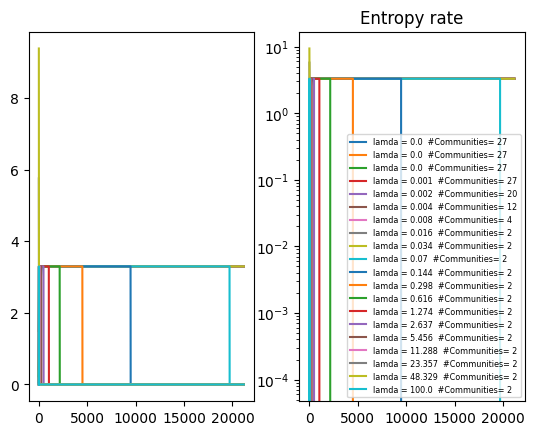

In [8]:
for i in range(len(lamdas)):
    plt.subplot(1, 2, 1)
    plt.plot(static_net_heat.S[lamdas[i]], label='lamda = ' + str(round(lamdas[i], 3)) + '  #Communities= ' + str(len(list_forw_flows[i].partition[0].cluster_list)))

    plt.subplot(1, 2, 2)
    plt.plot(static_net_heat.S[lamdas[i]], label='lamda = ' + str(round(lamdas[i], 3)) + '  #Communities= ' + str(len(list_forw_flows[i].partition[0].cluster_list)), )
    plt.yscale('log')
plt.legend(fontsize='xx-small', loc='lower right')
plt.title('Entropy rate')
#plt.savefig('./fig_entropy_rate', format='eps')

In [9]:
for i in lamdas:
    static_net_heat.compute_spectral_vonNeumann_entropy(lamda=i, force_csr=True)

/Users/samuelkoovely/Documents/GitHub/flow_stability/flow_stability_env/lib/python3.11/site-packages/scipy/sparse/_base.py:645: RuntimeWarning: divide by zero encountered in scalar divide
  return self.astype(np.float_)._mul_scalar(1./other)
/Users/samuelkoovely/Documents/GitHub/flow_stability/flow_stability_env/lib/python3.11/site-packages/scipy/sparse/_data.py:126: RuntimeWarning: invalid value encountered in multiply
  return self._with_data(self.data * other)


Text(0.5, 1.0, 'Spectral Von Neumann Entropy')

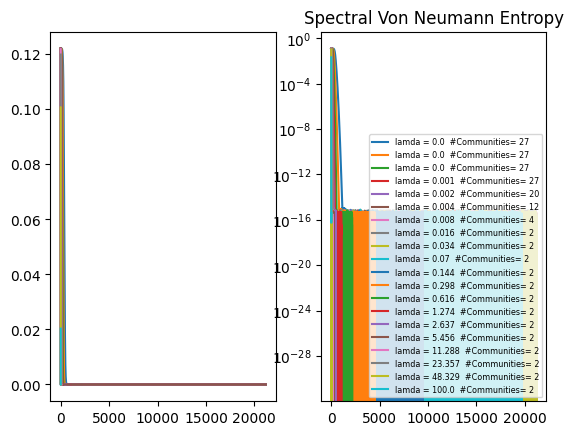

In [10]:
for i in range(len(lamdas)):
    plt.subplot(1, 2, 1)
    plt.plot(static_net_heat.spectral_vNS[lamdas[i]], label='lamda = ' + str(round(lamdas[i], 3)) + '  #Communities= ' + str(len(list_forw_flows[i].partition[0].cluster_list)))

    plt.subplot(1, 2, 2)
    plt.plot(static_net_heat.spectral_vNS[lamdas[i]], label='lamda = ' + str(round(lamdas[i], 3)) + '  #Communities= ' + str(len(list_forw_flows[i].partition[0].cluster_list)), )
    plt.yscale('log')
plt.legend(fontsize='xx-small', loc='lower right')
plt.title('Spectral Von Neumann Entropy')
#plt.savefig('./fig_simple_vNEntropy', format='eps')

In [ ]:
for i in lamdas:
    static_net_heat.compute_new_vonNeumann_entropy(lamda=i, force_csr=True)

In [ ]:
for i in range(len(lamdas)):
    entropy_list = static_net_heat.new_vNS
    color = plt.cm.viridis(i / len(entropy_list))
    
    plt.subplot(1, 2, 1)
    plt.plot(entropy_list[lamdas[i]], label='lamda = ' + str(round(lamdas[i], 3)) + '  #Communities= ' + str(len(list_forw_flows[i].partition[0].cluster_list)), color=color)

    plt.subplot(1, 2, 2)
    plt.plot(entropy_list[lamdas[i]], label='lamda = ' + str(round(lamdas[i], 3)) + '  #Communities= ' + str(len(list_forw_flows[i].partition[0].cluster_list)) , color=color)
    plt.yscale('log')
plt.legend(fontsize='xx-small', loc='lower right')
plt.title('New von Neumann Entropy (heat version)')
#plt.savefig('./fig_entropy_rate', format='eps')

plt.show()

In [ ]:
static_net_heat.adjacency.todense()

In [ ]:
plt.matshow(static_net_heat.adjacency.todense())

In [ ]:
plt.matshow(static_net_heat.laplacians.todense())

# Derivatives

In [9]:
def derivative(v1, v2):
    assert len(v1) == len(v2), "Error: in order to compute the numerical derivative, the two varibales need to have the same lenght."
    derivative = []
    for i, vi in enumerate(v1[1:]):
        m1 =(vi - v1[i-1])/(v2[i]-v2[i-1])
        m2 =(v1[i+1] - vi)/(v2[i+1]-v2[i])
        derivative.append((m1+m2)/2)
    return derivative

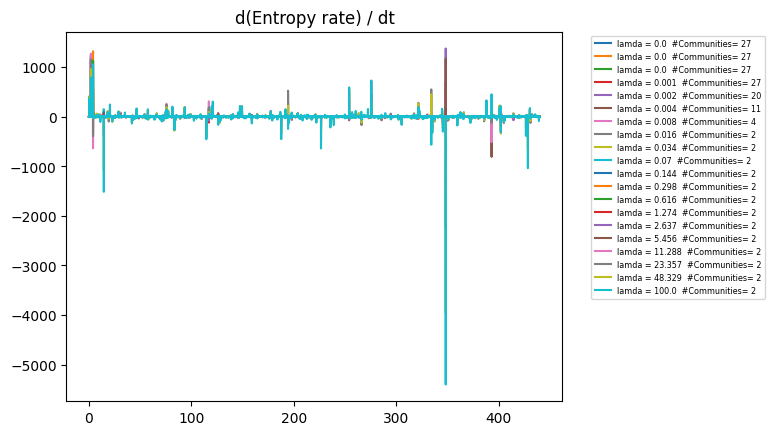

In [26]:
for i in range(len(lamdas)):
    v1 = net.S[lamdas[i]]
    v2 = net.times[:-1]
    ds_dt = derivative(v1, v2)

    plt.plot(net.times[1:-1], ds_dt, label='lamda = ' + str(round(lamdas[i], 3)) + '  #Communities= ' + str(len(list_forw_flows[i].partition[0].cluster_list)))

plt.legend(fontsize='xx-small', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('d(Entropy rate) / dt')
#plt.savefig('./fig_entropy_rate', format='eps')

plt.show()

In [11]:
between_lamdas=np.linspace(-4,2,20)

In [15]:
net.times

Index([0.0021078389107813534,   0.03946113642999958,   0.08271202728976333,
         0.11241964027451552,   0.14619336716470338,   0.14958916231770542,
          0.2546787235626574,   0.29902436132933463,   0.33122006671746274,
          0.3411758263646499,
       ...
          439.76839148097696,     439.7757188679915,    439.78747849732815,
          439.79148253363195,    439.82978990127083,    439.88934819352664,
           439.9800192132641,     439.9934683551178,     439.9980726464986,
          440.01078702437513],
      dtype='float64', name='times', length=21174)

In [31]:
sample_times = np.arange(0, len(net.times), 2000)
print(sample_times)

[    0  2000  4000  6000  8000 10000 12000 14000 16000 18000 20000]


## Derivative Entropy Rate

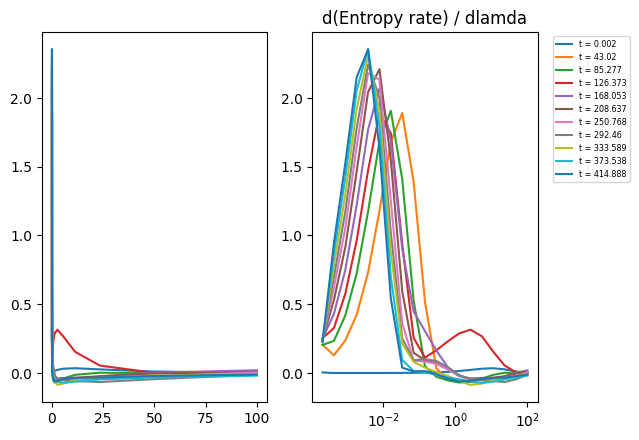

In [35]:
for i, t in enumerate(sample_times):

    St = []
    for j, lamda in enumerate(lamdas):
        St.append(net.S[lamda][t])
    
    v1 = St
    v2 = between_lamdas
    ds_dt = derivative(v1, v2)

    plt.subplot(1, 2, 1)
    plt.plot(lamdas[1:], ds_dt, label='t = ' + str(round(net.times[t], 3)))

    plt.subplot(1, 2, 2)
    plt.plot(lamdas[1:], ds_dt, label='t = ' + str(round(net.times[t], 3)))
    plt.xscale('log')

plt.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))
plt.title('d(Entropy rate) / dlamda')
#plt.savefig('./fig_entropy_rate', format='eps')

plt.show()

## Derivative Simplified Von Neumann

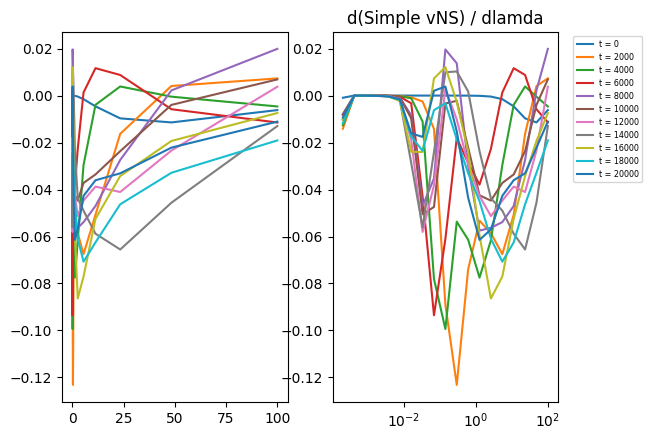

In [33]:
for i, t in enumerate(sample_times):

    St = []
    for j, lamda in enumerate(lamdas):
        St.append(net.simple_vNS[lamda][t])
    
    v1 = St
    v2 = between_lamdas
    ds_dt = derivative(v1, v2)

    plt.subplot(1, 2, 1)
    plt.plot(lamdas[1:], ds_dt, label='t = ' + str(round(t, 3)))

    plt.subplot(1, 2, 2)
    plt.plot(lamdas[1:], ds_dt, label='t = ' + str(round(t, 3)))
    plt.xscale('log')

plt.legend(fontsize='xx-small', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('d(Simple vNS) / dlamda')
#plt.savefig('./fig_entropy_rate', format='eps')

plt.show()

# Derivatives Static Network

In [46]:
between_lamdas=np.linspace(-4,2,20)

In [47]:
sample_times = np.arange(0, len(static_net.times), 1000)
print(sample_times)

[    0  1000  2000  3000  4000  5000  6000  7000  8000  9000 10000 11000
 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000]


### Derivative Entropy Rate

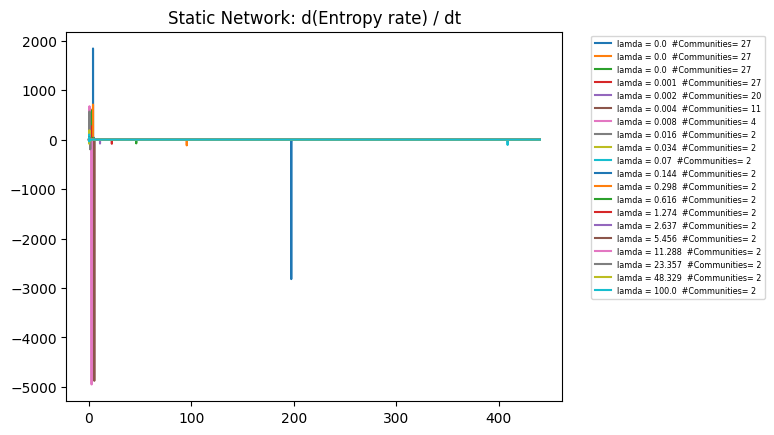

In [48]:
for i in range(len(lamdas)):
    v1 = static_net.S[lamdas[i]]
    v2 = static_net.times[:]
    ds_dt = derivative(v1, v2)

    plt.plot(static_net.times[1:], ds_dt, label='lamda = ' + str(round(lamdas[i], 3)) + '  #Communities= ' + str(len(list_forw_flows[i].partition[0].cluster_list)))

plt.legend(fontsize='xx-small', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('Static Network: d(Entropy rate) / dt')
#plt.savefig('./fig_entropy_rate', format='eps')

plt.show()

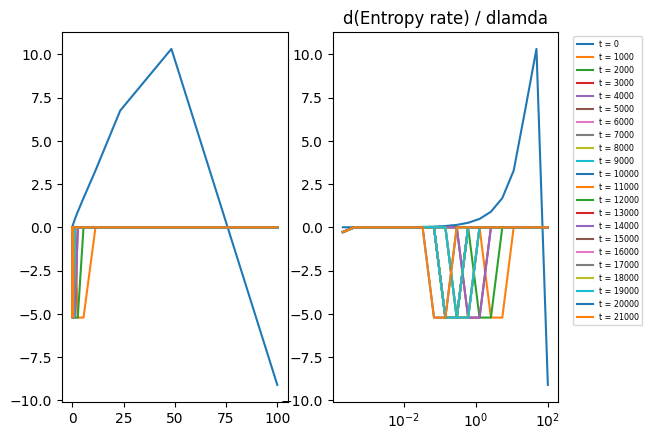

In [49]:
for i, t in enumerate(sample_times):

    St = []
    for j, lamda in enumerate(lamdas):
        St.append(static_net.S[lamda][t])
    
    v1 = St
    v2 = between_lamdas
    ds_dt = derivative(v1, v2)

    plt.subplot(1, 2, 1)
    plt.plot(lamdas[1:], ds_dt, label='t = ' + str(round(t, 3)))

    plt.subplot(1, 2, 2)
    plt.plot(lamdas[1:], ds_dt, label='t = ' + str(round(t, 3)))
    plt.xscale('log')
    
   

plt.legend(fontsize='xx-small', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('d(Entropy rate) / dlamda')
#plt.savefig('./fig_entropy_rate', format='eps')

plt.show()

### Derivative Spectral von Neumann

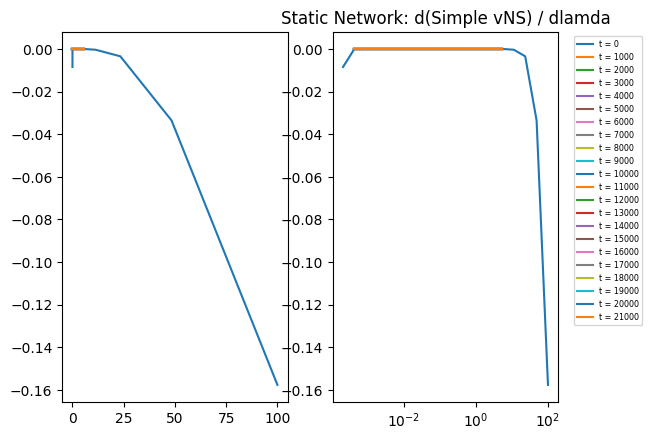

In [50]:
for i, t in enumerate(sample_times):

    St = []
    for j, lamda in enumerate(lamdas):
        St.append(static_net.spectral_vNS[lamda][t])
    
    v1 = St
    v2 = between_lamdas
    ds_dt = derivative(v1, v2)

    plt.subplot(1, 2, 1)
    plt.plot(lamdas[1:], ds_dt, label='t = ' + str(round(t, 3)))

    plt.subplot(1, 2, 2)
    plt.plot(lamdas[1:], ds_dt, label='t = ' + str(round(t, 3)))
    plt.xscale('log')

plt.legend(fontsize='xx-small', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('Static Network: d(Simple vNS) / dlamda')
#plt.savefig('./fig_entropy_rate', format='eps')

plt.show()